# 全臺Easy Go電動車充電站分布

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

In [2]:
df = pd.read_csv('https://www.lev.org.tw/Files/ievfile/ChargingRenta_Station.csv')
df2 = df.loc[:,'充電站':'緯度']
df3 = df2.drop(columns=['租賃站'])
df3.head()

,充電站,地點,站數,地址,經度,緯度
0,Y,基隆成功停車場,1,基隆市仁愛區成功一路88號3樓,25.127441,121.737452
1,Y,博愛地下停車場,2,基隆市仁愛區愛三路11號B1F,25.127358,121.74178
2,Y,基隆海洋科學博物館,1,基隆市中正區北寧路367號,25.140135,121.799284
3,Y,府前廣場地下停車場,2,臺北市信義區松壽路1號B1,25.036536,121.56402
4,Y,洛陽綜合立體停車場,1,臺北市萬華區環河南路1段1號(B1-西區86~87),25.0478805,121.5053365


### 全臺充電站總站數

In [3]:
np.sum(df3.站數)

739

In [4]:
county = ['基隆市', '臺北市', '新北市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '臺中市', '彰化縣', '南投縣', '雲林縣',
          '嘉義市', '嘉義縣', '臺南市', '高雄市', '屏東縣', '臺東縣', '花蓮縣', '宜蘭縣', '澎湖縣', '金門縣', '連江縣']

In [5]:
chargeStationNum = []
for c in county:
    chargeStationNum.append(np.sum(df3[df3.地址.str.contains(c)].站數))

In [6]:
chargeStationNum

[6, 124, 148, 16, 0, 3, 0, 353, 0, 2, 0, 0, 3, 64, 12, 1, 0, 1, 1, 0, 2, 0]

In [7]:
countyCharge = list(zip(chargeStationNum,county))
countyCharge.sort(reverse=True)
countyCharge
chargeStationNum,county =zip(*countyCharge)
#countyCharge_arr = np.array(countyCharge)
#countyCharge_arr.T.sort()
#countyCharge_arr.T

## 依照地址分別計算各縣市充電站總數，顯示排序後長條圖

<BarContainer object of 22 artists>

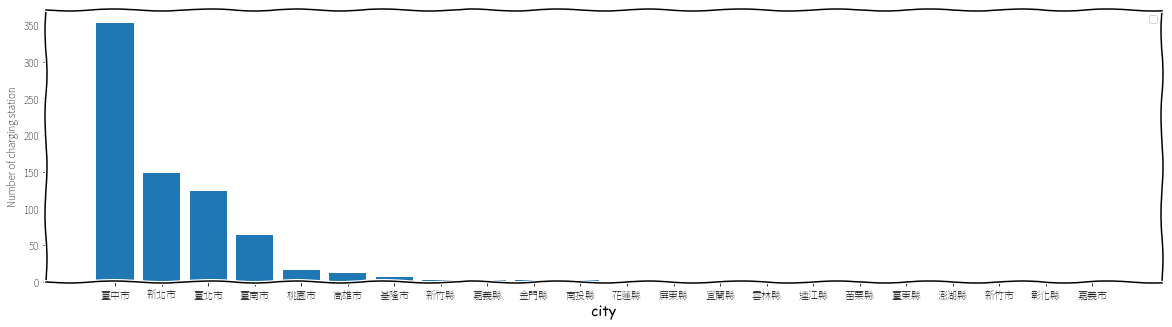

In [8]:
plt.figure(figsize=(20,5))
plt.xkcd()
plt.legend('upper right')
plt.xlabel("city")
plt.ylabel("Number of charging station")
plt.bar(county, chargeStationNum)

## 由於資料表有些資料有誤，先拿掉有誤的資料(共五筆)

In [9]:
df4 = df3.drop(df3.index[[263,263]])
df5 = df4.drop(df4.index[[258,258]])
df6 = df5.drop(df5.index[[132,132]])
df7 = df6.drop(df6.index[[122,122]])
df8 = df7.drop(df7.index[[23,23]])

## 依經緯度畫出全臺充電站的位置分布圖

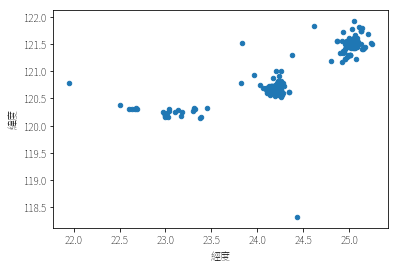

In [10]:
import locale
# atof

locale.setlocale(locale.LC_NUMERIC, '')
df8['經度'] = df8['經度'].apply(locale.atof)
df8['緯度'] = df8['緯度'].apply(locale.atof)
df8.plot.scatter(x = '經度', y = '緯度')